In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Preparing data set

In [2]:
dfx = pd.read_csv("./data/xdata.csv")
dfy = pd.read_csv("./data/ydata.csv")

# Converting dataframes to numpy array
dfx = dfx.values
dfy = dfy.values

# Since the data set contains serial numbers too so slicing them off 
x_train = dfx[:, 1:]
y_train = dfy[:, 1:]
y_train = y_train.reshape((399, ))

## Visualising the data set

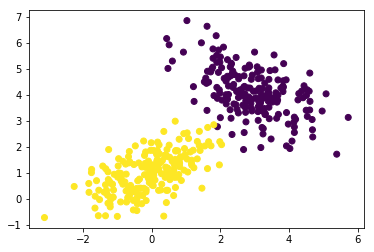

In [3]:
plt.scatter(x_train[:, 0], x_train[:, 1],c = y_train)
plt.show()

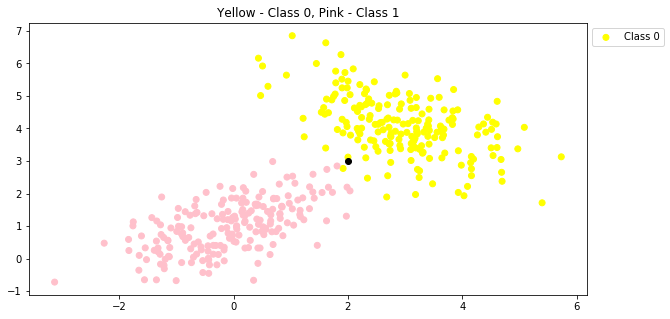

In [60]:
query_point = np.array([2, 3])

# assigning different colors to different target values
def colors(y_train):
    m = y_train.shape[0]
    col = []
    for i in y_train:
        if(i == 0):
            col.append('yellow')
        else:
            col.append('pink')
    return col

col = colors(y_train)

# now we need to classify whether the new data point(black) will belong to which class
plt.rcParams['figure.figsize'] = 10,5
plt.title("Yellow - Class 0, Pink - Class 1")
plt.scatter(x_train[:, 0], x_train[:, 1],c = col, label = "Class 0")
plt.scatter(query_point[0], query_point[1], color = "black")
plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.show()

## The Algorithm

In [46]:
# distance function will take two vectors(arrays) and return the Eucledean distance between those points
def distance(query_point, any_point):
    dist = np.sqrt(sum((query_point - any_point)**2))
    return dist

def knn(x_train, y_train, query_point, k = 5):
    # value will be a list of tuples which will have distance and the target value, so that we know what class does the 
    # nearest k neighbours belong to
    value = []
    m = x_train.shape[0]
    for i in range(m):
        val = distance(query_point, x_train[i])
        value.append((val, y_train[i]))
    # sorting performed on first column i.e distance between the points and not the second column(0 and 1)    
    sorted_values = sorted(value)
    knn = sorted_values[:k]
    knn = np.array(knn)
    return knn
v = knn(x_train, y_train, query_point)
v

array([[0.11937695, 0.        ],
       [0.24392799, 1.        ],
       [0.24435617, 0.        ],
       [0.32750158, 0.        ],
       [0.44941874, 1.        ]])

In [49]:
# count function counts the number of 0s and 1s target values present in knn to determine the majority class
# count function will finally give us the predicted class for the query point
def count(x_train, y_train, query_point):
    val = knn(x_train, y_train, query_point)
    count_0 = 0.0
    count_1 = 0.0
    for i in val:
        if(i[1] == 0):
            count_0 = count_0 + 1
        else:
            count_1 = count_1 + 1
    if(count_0 > count_1):
        return 0
    else:
        return 1

prediction = count(x_train, y_train, query_point = np.array([0,0]))
print("Predicted class for the query point is", prediction)

Predicted class for the query point is 1
